In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('drug-use-by-age.csv')
print(df.head())

  age     n  alcohol_use  alcohol_frequency  marijuana_use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana_frequency  cocaine_use cocaine_frequency  crack_use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack_frequency  ...  oxycontin_use oxycontin_frequency  tranquilizer_use  \
0               -  ...            0.1                24.5               0.2   
1             3.0  ...            0.1                41.0   

In [21]:
df = df.replace('-', 0)

# Convert relevant columns to numeric
for col in df.columns:
    if '_use' in col or '_frequency' in col or col == 'n':
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol_use              17 non-null     float64
 3   alcohol_frequency        17 non-null     float64
 4   marijuana_use            17 non-null     float64
 5   marijuana_frequency      17 non-null     float64
 6   cocaine_use              17 non-null     float64
 7   cocaine_frequency        17 non-null     float64
 8   crack_use                17 non-null     float64
 9   crack_frequency          17 non-null     float64
 10  heroin_use               17 non-null     float64
 11  heroin_frequency         17 non-null     float64
 12  hallucinogen_use         17 non-null     float64
 13  hallucinogen_frequency   17 non-null     float64
 14  inhalant_use             17 

In [25]:
use_columns = [col for col in df.columns if '_use' in col]
df['total_drug_use'] = df[use_columns].sum(axis=1)

# Verify the new column
print(df[['age', 'total_drug_use']].head())

  age  total_drug_use
0  12             9.7
1  13            18.4
2  14            37.5
3  15            59.6
4  16            82.1


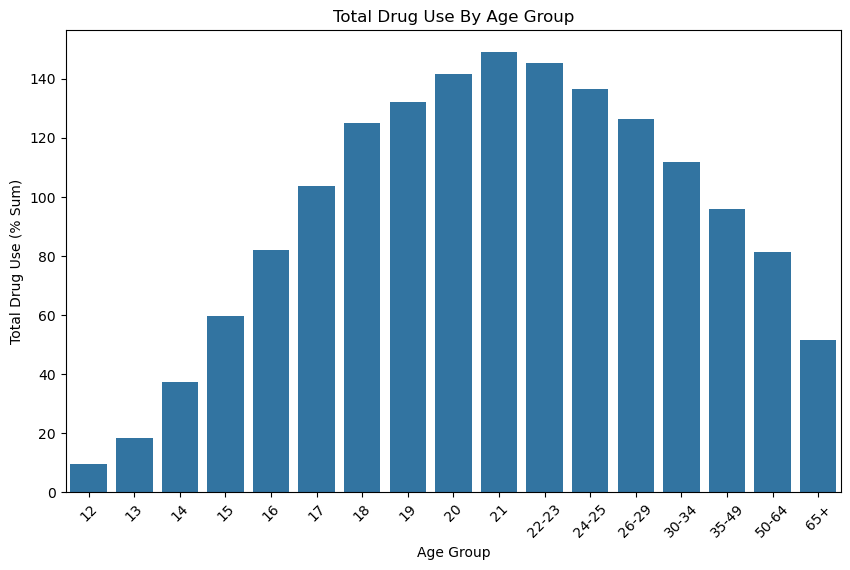

In [31]:
plt.figure(figsize = (10 , 6))
sns.barplot(x = 'age' , y = 'total_drug_use' , data = df)
plt.title('Total Drug Use By Age Group')
plt.xticks(rotation = 45)
plt.ylabel('Total Drug Use (% Sum)')
plt.xlabel('Age Group')
plt.show()